In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch_geometric.utils import from_networkx
from sklearn.model_selection import train_test_split
from torch_geometric.loader import DataLoader
import torch
from torch.nn import functional as F
from torch_geometric.nn import GATConv, global_mean_pool
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import torch.nn as nn
from torch_geometric.data import Data




In [21]:
lines = []
with open('EP1.01.txt', 'r') as file:
    for line in file:
        lines.append(line)
print(len(lines))

910476


In [22]:
print(lines[0])
print(lines[1])
print(lines[2])
print(lines[3])
print(lines[4])

67635	67635	EP	AF3	6	260	4395.384615,4382.564102,4377.435897,4387.179487,4395.897435,4398.461538,4396.923076,4391.794871,4391.282051,4395.897435,4398.974358,4396.410256,4392.820512,4392.820512,4395.384615,4398.974358,4394.358974,4381.538461,4376.410256,4383.589743,4387.179487,4388.717948,4397.948717,4401.538461,4397.948717,4398.974358,4398.974358,4395.897435,4396.923076,4398.461538,4397.948717,4396.410256,4391.794871,4389.743589,4389.743589,4385.641025,4387.692307,4393.846153,4389.743589,4381.025641,4377.948717,4378.461538,4377.435897,4385.128205,4393.333333,4389.230769,4382.564102,4378.974358,4375.384615,4378.461538,4386.153846,4389.230769,4393.846153,4390.256410,4374.871794,4367.692307,4374.871794,4384.615384,4390.769230,4394.358974,4390.769230,4382.051282,4381.025641,4385.641025,4376.923076,4365.641025,4373.333333,4377.948717,4365.128205,4363.589743,4375.897435,4374.358974,4368.205128,4373.333333,4378.461538,4375.897435,4374.358974,4376.410256,4377.435897,4376.410256,4370.256410,437

In [23]:
split_ = lines[0].split()
for i in range(len(split_)):
    print(i, split_[i])

0 67635
1 67635
2 EP
3 AF3
4 6
5 260
6 4395.384615,4382.564102,4377.435897,4387.179487,4395.897435,4398.461538,4396.923076,4391.794871,4391.282051,4395.897435,4398.974358,4396.410256,4392.820512,4392.820512,4395.384615,4398.974358,4394.358974,4381.538461,4376.410256,4383.589743,4387.179487,4388.717948,4397.948717,4401.538461,4397.948717,4398.974358,4398.974358,4395.897435,4396.923076,4398.461538,4397.948717,4396.410256,4391.794871,4389.743589,4389.743589,4385.641025,4387.692307,4393.846153,4389.743589,4381.025641,4377.948717,4378.461538,4377.435897,4385.128205,4393.333333,4389.230769,4382.564102,4378.974358,4375.384615,4378.461538,4386.153846,4389.230769,4393.846153,4390.256410,4374.871794,4367.692307,4374.871794,4384.615384,4390.769230,4394.358974,4390.769230,4382.051282,4381.025641,4385.641025,4376.923076,4365.641025,4373.333333,4377.948717,4365.128205,4363.589743,4375.897435,4374.358974,4368.205128,4373.333333,4378.461538,4375.897435,4374.358974,4376.410256,4377.435897,4376.410256,4

In [24]:
event = []
digit = []
pos = []
data = []
line_counter = 0

data_df = pd.DataFrame(columns=['event', 'digit', 'pos', 'data'])

for line in lines:
    if line_counter<14_000:
        split_line = line.split()
        event.append(split_line[1])
        digit.append(split_line[4])
        pos.append(split_line[3])
        data.append(split_line[6])
        line_counter+=1

data_df['event'] = event
data_df['digit'] = digit
data_df['pos'] = pos
data_df['data'] = data

print(data_df.head())
print(data_df.shape)

   event digit  pos                                               data
0  67635     6  AF3  4395.384615,4382.564102,4377.435897,4387.17948...
1  67635     6   F7  4489.230769,4475.384615,4474.358974,4486.66666...
2  67635     6   F3  4538.461538,4528.717948,4524.615384,4526.15384...
3  67635     6  FC5  4207.692307,4205.641025,4200.512820,4194.35897...
4  67635     6   T7  4497.948717,4498.461538,4494.871794,4497.94871...
(14000, 4)


In [25]:
data_df['data'] = data_df['data'].apply(lambda x: [float(i) for i in x.split(',')])
data_df['data'] = data_df['data'].apply(lambda x: x[:250])

data_df['event'] = data_df['event'].apply(float)
data_df['digit'] = data_df['digit'].apply(float)
data_df['digit'] = data_df['digit'].apply(lambda x: 10 if x == -1 else x)


# scaler = StandardScaler()
# data_df['data'] = data_df['data'].apply(lambda x: scaler.fit_transform(np.array(x).reshape(-1, 1)).flatten())

# data_df.to_csv('data_df.csv')

print(data_df.head(28))
print(data_df.shape)


      event  digit  pos                                               data
0   67635.0    6.0  AF3  [4395.384615, 4382.564102, 4377.435897, 4387.1...
1   67635.0    6.0   F7  [4489.230769, 4475.384615, 4474.358974, 4486.6...
2   67635.0    6.0   F3  [4538.461538, 4528.717948, 4524.615384, 4526.1...
3   67635.0    6.0  FC5  [4207.692307, 4205.641025, 4200.51282, 4194.35...
4   67635.0    6.0   T7  [4497.948717, 4498.461538, 4494.871794, 4497.9...
5   67635.0    6.0   P7  [4203.076923, 4192.820512, 4194.871794, 4204.6...
6   67635.0    6.0   O1  [4203.076923, 4193.333333, 4194.871794, 4207.1...
7   67635.0    6.0   O2  [4229.743589, 4216.923076, 4207.179487, 4215.3...
8   67635.0    6.0   P8  [4245.641025, 4236.410256, 4218.461538, 4220.0...
9   67635.0    6.0   T8  [4506.666666, 4501.025641, 4496.923076, 4496.9...
10  67635.0    6.0  FC6  [4227.692307, 4215.384615, 4210.76923, 4221.02...
11  67635.0    6.0   F4  [4682.051282, 4667.179487, 4662.051282, 4669.2...
12  67635.0    6.0   F8  

In [26]:
pos_values = data_df['pos'].unique()
print(pos_values)
data_lengths = data_df['data'].apply(len)
unique_lengths = data_lengths.unique()
print(unique_lengths)

['AF3' 'F7' 'F3' 'FC5' 'T7' 'P7' 'O1' 'O2' 'P8' 'T8' 'FC6' 'F4' 'F8' 'AF4']
[250 248]


In [27]:
from scipy.spatial.distance import euclidean
from scipy.stats import pearsonr
from fastdtw import fastdtw  


def calculate_correlation(series1, series2):
    return pearsonr(series1, series2)[0]

def calculate_euclidean(series1, series2):
    return euclidean(series1, series2)

def calculate_dtw(series1, series2):
    distance, path = fastdtw(series1, series2)
    return distance

probes = data_df['pos'].unique()
similarity_matrix_corr = pd.DataFrame(index=probes, columns=probes)
similarity_matrix_euc = pd.DataFrame(index=probes, columns=probes)
similarity_matrix_dtw = pd.DataFrame(index=probes, columns=probes)


for i, probe1 in enumerate(probes):
    for j, probe2 in enumerate(probes):
        if i < j:  
            series1 = data_df[data_df['pos'] == probe1]['data'].iloc[0]
            series2 = data_df[data_df['pos'] == probe2]['data'].iloc[0]
            
            corr = calculate_correlation(series1, series2)
            euc = calculate_euclidean(series1, series2)
            dtw = calculate_dtw(series1, series2)  
            
            similarity_matrix_corr.at[probe1, probe2] = corr
            similarity_matrix_euc.at[probe2, probe1] = euc
            similarity_matrix_dtw.at[probe1, probe2] = dtw  

np.fill_diagonal(similarity_matrix_corr.values, 0)
np.fill_diagonal(similarity_matrix_euc.values, 0)
np.fill_diagonal(similarity_matrix_dtw.values, 0)

print(similarity_matrix_corr)
print(similarity_matrix_euc)
print(similarity_matrix_dtw)


     AF3        F7        F3       FC5        T7        P7        O1  \
AF3    0  0.120298  0.844614  0.460885  0.321127   0.49943 -0.274865   
F7   NaN         0 -0.007454  0.164885  0.111316  -0.40595  0.679203   
F3   NaN       NaN         0  0.456136  0.459106   0.61893 -0.304065   
FC5  NaN       NaN       NaN         0  0.257494  0.142621   0.19319   
T7   NaN       NaN       NaN       NaN         0  0.627695 -0.146403   
P7   NaN       NaN       NaN       NaN       NaN         0 -0.630926   
O1   NaN       NaN       NaN       NaN       NaN       NaN         0   
O2   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
P8   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
T8   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
FC6  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
F4   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
F8   NaN       NaN       NaN       NaN       NaN       NaN      

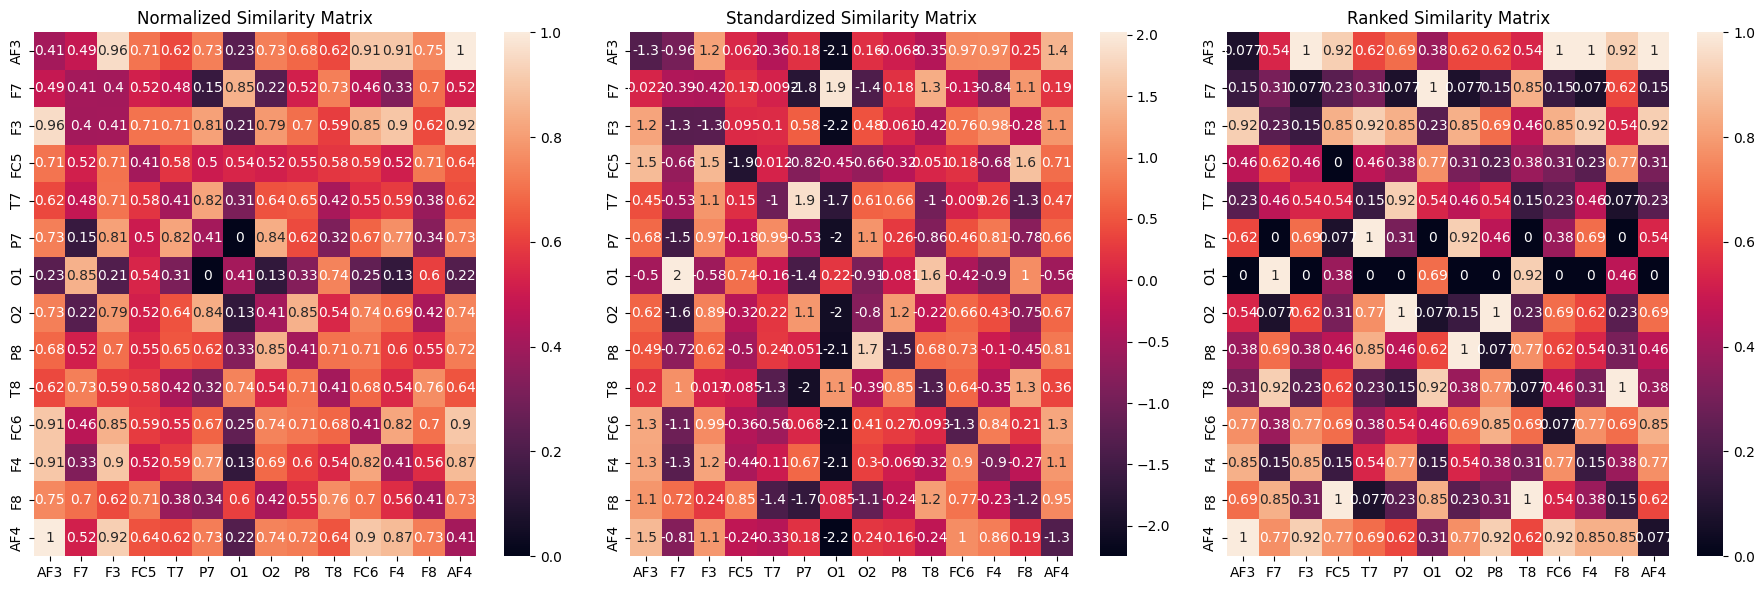

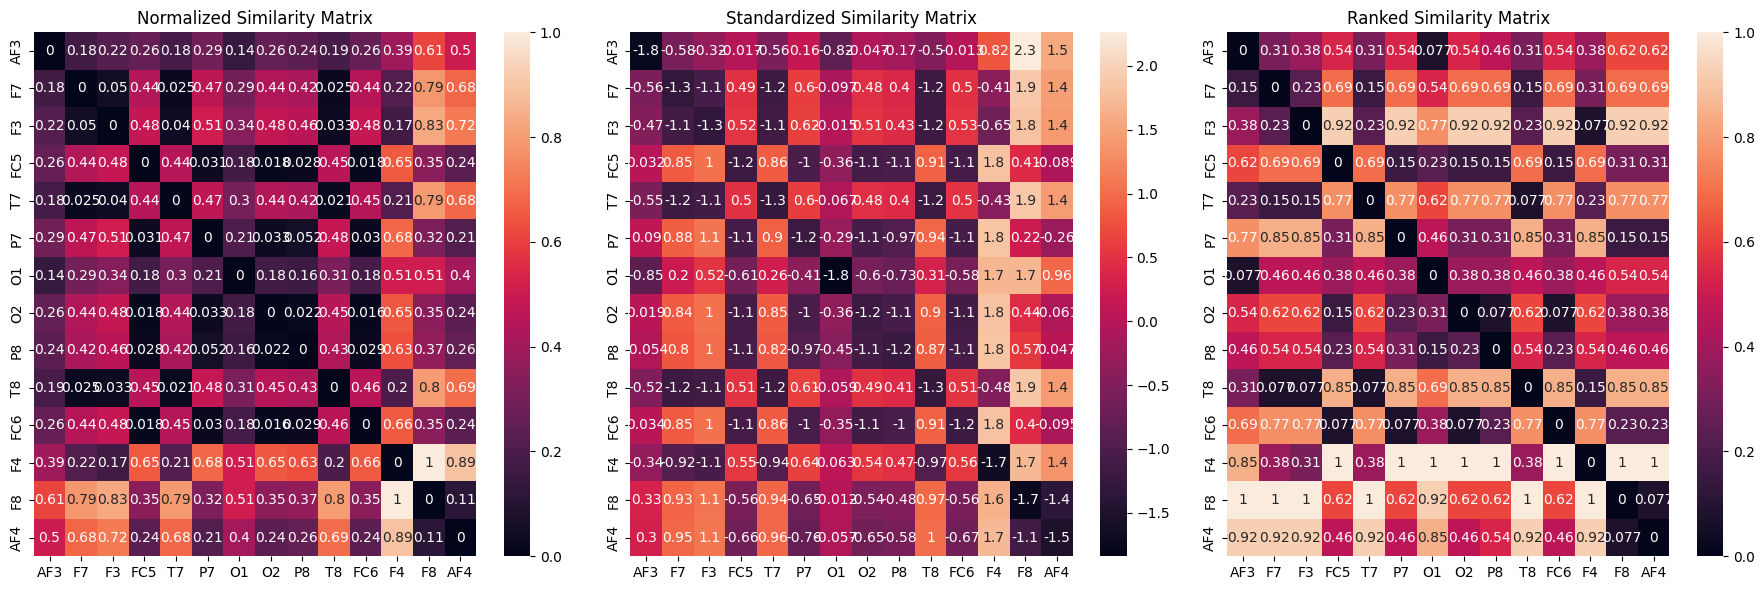

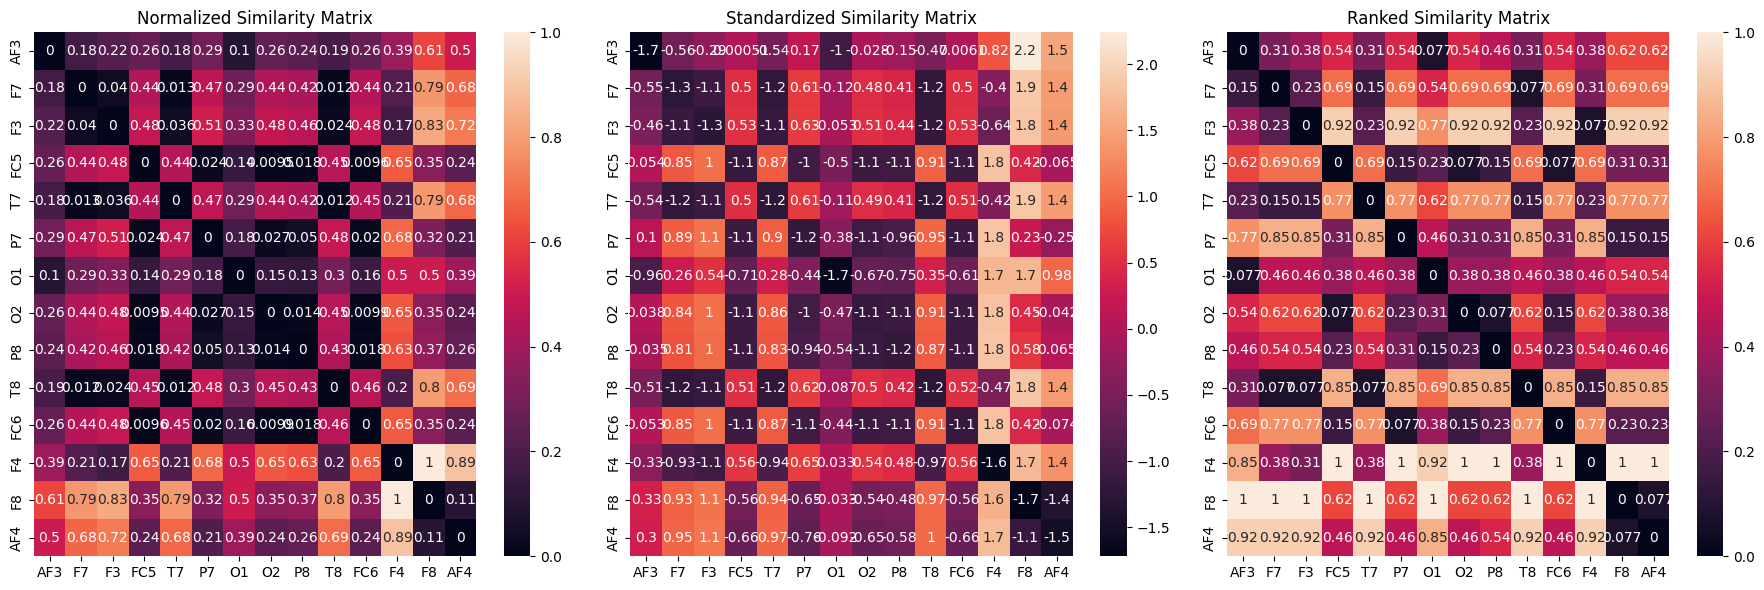

In [28]:
import numpy as np
from scipy.stats import zscore, rankdata
import seaborn as sns
import matplotlib.pyplot as plt

def compare_sim_mat(similarity_matrix):
    similarity_matrix = similarity_matrix.apply(pd.to_numeric, errors='coerce')

    similarity_matrix = similarity_matrix.where(pd.notna(similarity_matrix), similarity_matrix.T)

    range_val = similarity_matrix.max().max() - similarity_matrix.min().min()
    if range_val == 0:
        normalized_matrix = similarity_matrix  
    else:
        normalized_matrix = (similarity_matrix - similarity_matrix.min().min()) / range_val

    standardized_matrix = similarity_matrix.apply(lambda x: (x - x.mean()) / x.std(), axis=1)

    ranked_matrix = similarity_matrix.rank(method='average')
    ranked_matrix = (ranked_matrix - ranked_matrix.min().min()) / (ranked_matrix.max().max() - ranked_matrix.min().min())

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    sns.heatmap(normalized_matrix, annot=True, ax=axes[0])
    axes[0].set_title('Normalized Similarity Matrix')

    sns.heatmap(standardized_matrix, annot=True, ax=axes[1])
    axes[1].set_title('Standardized Similarity Matrix')

    sns.heatmap(ranked_matrix, annot=True, ax=axes[2])
    axes[2].set_title('Ranked Similarity Matrix')

    plt.tight_layout()
    plt.show()

compare_sim_mat(similarity_matrix_corr)  
compare_sim_mat(similarity_matrix_euc)  
compare_sim_mat(similarity_matrix_dtw)  



In [29]:
coordinates = {
    'AF3': {'phi': (129.9+89.7)/2,
            'theta': (52.2+41.0)/2},
    'F7': {'phi': 137.2,
            'theta': 83.1},
    'F3': {'phi': 129.9,
            'theta': 52.2},
    'FC5': {'phi': (137.2+129.9+173.9+180)/4 ,
            'theta': (83.1+52.2+95+45.2/4)},
    'T7': {'phi': 173.9,
            'theta': 95.0},
    'P7': {'phi': 216.1,
            'theta': 92.9},
    'O1': {'phi': 250.6,
            'theta': 89.2},
    'O2': {'phi': 287.5,
            'theta': 90.1},
    'P8': {'phi': 322.7,
            'theta': 94.9},
    'T8': {'phi': 3.2,
            'theta': 95.8},
    'FC6': {'phi': (-1.0+3.2+40.3+49.8)/4,
            'theta':(46.0+95.8+84.1+53.6)/4 },
    'F4': {'phi': 49.8,
            'theta': 53.6},
    'F8': {'phi': 40.3,
            'theta': 84.1},
    'AF4': {'phi': (89.7+49.8)/2,
            'theta': (41.0+53.6)/2}
}

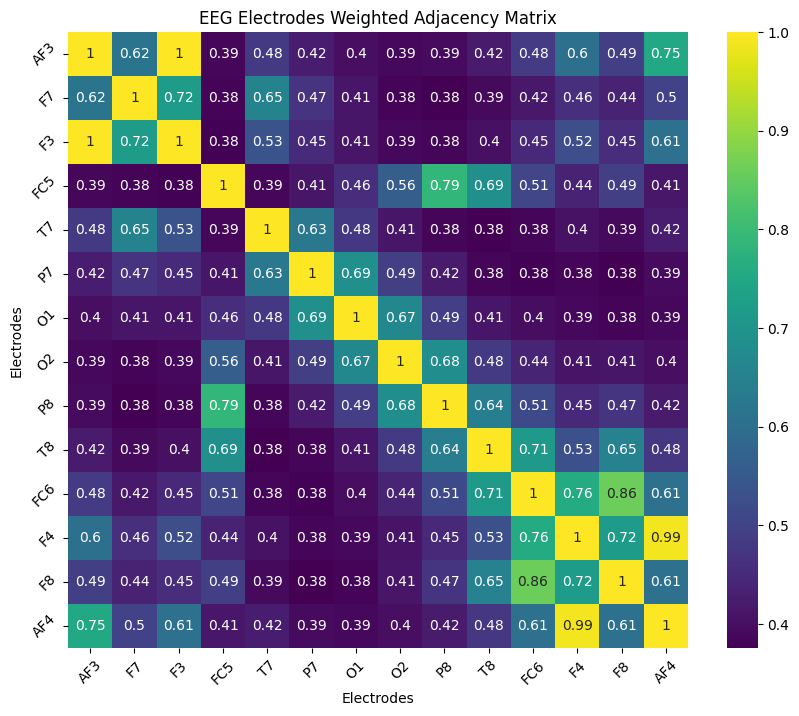

In [30]:
def spherical_to_cartesian(phi, theta):
    phi_rad = np.radians(phi)
    theta_rad = np.radians(theta)
    x = np.cos(phi_rad) * np.sin(theta_rad)
    y = np.sin(phi_rad) * np.sin(theta_rad)
    z = np.cos(theta_rad)
    return x, y, z

adjacency_matrix = np.zeros((len(coordinates), len(coordinates)))

for i, (coord_i, values_i) in enumerate(coordinates.items()):
    x_i, y_i, z_i = spherical_to_cartesian(values_i['phi'], values_i['theta'])
    for j, (coord_j, values_j) in enumerate(coordinates.items()):
        if i != j:
            x_j, y_j, z_j = spherical_to_cartesian(values_j['phi'], values_j['theta'])
            d = np.sqrt((x_j - x_i) ** 2 + (y_j - y_i) ** 2 + (z_j - z_i) ** 2)
            w = 1 / np.sqrt(d)
            adjacency_matrix[i, j] = w

max_weight = adjacency_matrix.max()
adjacency_matrix[adjacency_matrix > 0] /= max_weight

np.fill_diagonal(adjacency_matrix, 1)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(adjacency_matrix, annot=True, cmap='viridis', ax=ax)

plt.title('EEG Electrodes Weighted Adjacency Matrix')
plt.xlabel('Electrodes')
plt.ylabel('Electrodes')
plt.xticks(ticks=np.arange(len(coordinates)) + 0.5, labels=list(coordinates.keys()), rotation=45)
plt.yticks(ticks=np.arange(len(coordinates)) + 0.5, labels=list(coordinates.keys()), rotation=45)

plt.show()


In [31]:
def calculate_weights(coordinates):

    num_nodes = len(coordinates)
    adjacency_matrix = np.zeros((num_nodes, num_nodes))

    for i, coord_i in enumerate(coordinates.keys()):
        values_i = coordinates[coord_i]
        x_i, y_i, z_i = spherical_to_cartesian(values_i['phi'], values_i['theta'])
        for j, coord_j in enumerate(coordinates.keys()):
            if i != j:
                values_j = coordinates[coord_j]
                x_j, y_j, z_j = spherical_to_cartesian(values_j['phi'], values_j['theta'])
                d = np.sqrt((x_j - x_i) ** 2 + (y_j - y_i) ** 2 + (z_j - z_i) ** 2)
                w = 1 / d
                adjacency_matrix[i, j] = w

    max_weight = adjacency_matrix.max()
    adjacency_matrix[adjacency_matrix > 0] /= max_weight
    np.fill_diagonal(adjacency_matrix, 1)

    return adjacency_matrix



In [60]:
import torch
from torch_geometric.data import Data, Batch
from torch_geometric.utils import to_undirected, add_self_loops

class EEGGraphDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, edge_index, edge_weight):
        super(EEGGraphDataset, self).__init__()
        self.dataframe = dataframe
        self.edge_index = to_undirected(edge_index)
        self.edge_index, _ = add_self_loops(self.edge_index)
        self.edge_weight = edge_weight
        self.unique_events = dataframe['event'].unique()

    def __len__(self):
        return len(self.unique_events)

    def __getitem__(self, idx):
        event_id = self.unique_events[idx]
        event_data = self.dataframe[self.dataframe['event'] == event_id]
        sequence = []
        for time_step in range(len(event_data.iloc[0]['data'])):
            x = torch.tensor([row.data[time_step] for row in event_data.itertuples(index=False)], dtype=torch.float).unsqueeze(1)
            snapshot = Data(x=x, edge_index=self.edge_index, edge_attr=self.edge_weight)
            sequence.append(snapshot)
        label = event_data.iloc[0]['digit']
        return sequence, label


In [61]:
from torch_geometric.data import Batch

def collate_graph_sequences(batch):
    sequences, labels = zip(*batch)
    batched_sequences = [Batch.from_data_list(sequence) for sequence in sequences]
    return batched_sequences, torch.tensor(labels)


In [62]:
from sklearn.model_selection import train_test_split
import networkx as nx
from torch_geometric.utils import from_networkx

G = nx.complete_graph(14)  
edge_index = from_networkx(G).edge_index

weights = calculate_weights(coordinates)
edge_weights = torch.tensor(weights, dtype=torch.float)

eeg_dataset = EEGGraphDataset(data_df, edge_index, edge_weights)

train_dataset, test_dataset = train_test_split(eeg_dataset, test_size=0.2, random_state=42)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True, collate_fn=collate_graph_sequences)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, collate_fn=collate_graph_sequences)

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric_temporal.nn.recurrent import GConvGRU, DCRNN
from torch_geometric.nn import global_mean_pool

class GRU(torch.nn.Module):
    def __init__(self, node_features):
        super(GRU, self).__init__()
        self.recurrent1 = GConvGRU(node_features, 64, 2)
        self.recurrent2 = GConvGRU(64, 32, 2)
        self.recurrent3 = GConvGRU(32, 16, 2)
        self.recurrent4 = GConvGRU(16, 8, 2)
        self.linear = torch.nn.Linear(8, 11)

    def forward(self, x, edge_index, edge_weight, batch):
        h = self.recurrent1(x, edge_index, edge_weight)
        h = F.relu(h)
        h = self.recurrent2(h, edge_index, edge_weight)
        h = F.relu(h)
        h = self.recurrent3(h, edge_index, edge_weight)
        h = F.relu(h)
        h = self.recurrent4(h, edge_index, edge_weight)
        h = F.relu(h)
        h = self.linear(h)
        graph_output = global_mean_pool(h, batch)
        return graph_output

class DC(torch.nn.Module):
    def __init__(self, node_features):
        super(DC, self).__init__()
        self.recurrent1 = DCRNN(node_features, 32, 1)
        self.recurrent2 = DCRNN(32, 16, 1)
        self.recurrent3 = DCRNN(16, 16, 1)
        self.linear = torch.nn.Linear(16, 11)

    def forward(self, x, edge_index, edge_weight, batch):
        h = self.recurrent1(x, edge_index, edge_weight)
        h = F.relu(h)
        h = self.recurrent2(h, edge_index, edge_weight)
        h = F.relu(h)
        h = self.recurrent3(h, edge_index, edge_weight)
        h = F.relu(h)
        h = self.linear(h)
        graph_output = global_mean_pool(h, batch)
        return graph_output


In [ ]:
from sklearn.metrics import confusion_matrix
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from tqdm import tqdm

num_epochs = 100
node_features = 1

model = GRU(node_features)  # or DC(node_features)

optimizer = Adam(model.parameters(), lr=0.01)
criterion = CrossEntropyLoss()

def calculate_accuracy(y_pred, y_true):
    predicted = torch.argmax(y_pred, 1)
    correct = (predicted == y_true).float().sum()
    return (correct / y_true.shape[0]).item()

for epoch in tqdm(range(num_epochs)):
    model.train()
    total_loss = 0
    total_correct = 0
    all_labels = []
    all_preds = []

    for batched_sequences, labels in train_loader:
        optimizer.zero_grad()
        sequence_outputs = []

        for sequence in batched_sequences:
            graph_output = model(sequence.x, sequence.edge_index, sequence.edge_weight, sequence.batch)
            sequence_outputs.append(graph_output)

        sequence_outputs = torch.stack(sequence_outputs).mean(dim=1)
        labels = labels.long()
        loss = criterion(sequence_outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # Calculate accuracy
        total_correct += calculate_accuracy(sequence_outputs, labels)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(torch.argmax(sequence_outputs, 1).cpu().numpy())

    train_accuracy = total_correct / len(train_loader)
    train_confusion_matrix = confusion_matrix(all_labels, all_preds)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader)}, Train Accuracy: {train_accuracy}")
    print("Train Confusion Matrix:\n", train_confusion_matrix)

    # Validation
    model.eval()
    test_loss = 0
    total_correct = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for batched_sequences, labels in test_loader:
            sequence_outputs = []

            for sequence in batched_sequences:
                graph_output = model(sequence.x, sequence.edge_index, sequence.edge_weight, sequence.batch)
                sequence_outputs.append(graph_output)

            sequence_outputs = torch.stack(sequence_outputs).mean(dim=1)
            labels = labels.long()
            loss = criterion(sequence_outputs, labels)
            test_loss += loss.item()

            # Calculate accuracy
            total_correct += calculate_accuracy(sequence_outputs, labels)
            # all_labels.extend(labels.cpu().numpy())
            # all_preds.extend(torch.argmax(sequence_outputs, 1).cpu().numpy())

    test_accuracy = total_correct / len(test_loader)
    # test_confusion_matrix = confusion_matrix(all_labels, all_preds)
    print(f"Test Loss: {test_loss/len(test_loader)}, Test Accuracy: {test_accuracy}")
    # print("Test Confusion Matrix:\n", test_confusion_matrix)


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Loss: 2.3806986063718796, Train Accuracy: 0.1
Train Confusion Matrix:
 [[0 0 6 0 0 0 0 0 1 0]
 [0 0 9 0 0 0 0 0 0 0]
 [0 1 5 0 0 0 0 0 2 1]
 [0 0 8 0 0 0 0 0 2 0]
 [0 0 1 0 0 0 0 0 1 0]
 [0 0 7 0 0 0 0 0 0 0]
 [0 0 7 0 0 0 0 0 0 0]
 [0 0 9 0 0 0 0 0 1 0]
 [0 0 9 0 0 0 0 0 3 0]
 [0 0 7 0 0 0 0 0 0 0]]


  1%|          | 1/100 [00:39<1:04:25, 39.04s/it]

Test Loss: 2.2895056128501894, Test Accuracy: 0.1
Epoch 2/100, Loss: 2.302725538611412, Train Accuracy: 0.15
Train Confusion Matrix:
 [[ 0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  7  0]]


  2%|▏         | 2/100 [01:14<1:00:33, 37.07s/it]

Test Loss: 2.2630359172821044, Test Accuracy: 0.1
Epoch 3/100, Loss: 2.279681625962257, Train Accuracy: 0.075
Train Confusion Matrix:
 [[ 0  0  0  0  0  0  0  6  1  0]
 [ 0  0  0  1  0  0  0  2  6  0]
 [ 0  0  0  0  0  0  0  8  1  0]
 [ 0  0  0  0  0  0  0  8  2  0]
 [ 0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  1  0  0  0  3  3  0]
 [ 0  0  0  1  0  0  0  4  2  0]
 [ 0  0  0  3  0  0  0  4  3  0]
 [ 0  0  0  0  0  0  0 10  2  0]
 [ 0  0  0  1  0  0  0  5  1  0]]


  3%|▎         | 3/100 [01:50<58:44, 36.33s/it]  

Test Loss: 2.2480634570121767, Test Accuracy: 0.1
Epoch 4/100, Loss: 2.2815617293119432, Train Accuracy: 0.15
Train Confusion Matrix:
 [[ 0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  7  0]]


  4%|▍         | 4/100 [02:26<58:11, 36.37s/it]

Test Loss: 2.2295762419700624, Test Accuracy: 0.1


  4%|▍         | 4/100 [02:27<58:48, 36.76s/it]


KeyboardInterrupt: 